In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Sep 2023_April 10 2024.csv')
df['Volatility'] = df['High'] - df['Low']
max_volatility_day = df.loc[df['Volatility'].idxmax()]
print(max_volatility_day)


Date             4/4/2024
Open          18331.01953
High          18362.28906
Low              17875.75
Close          17878.7793
Adj Close      17878.7793
Volume         5368700000
Volatility      486.53906
Name: 147, dtype: object


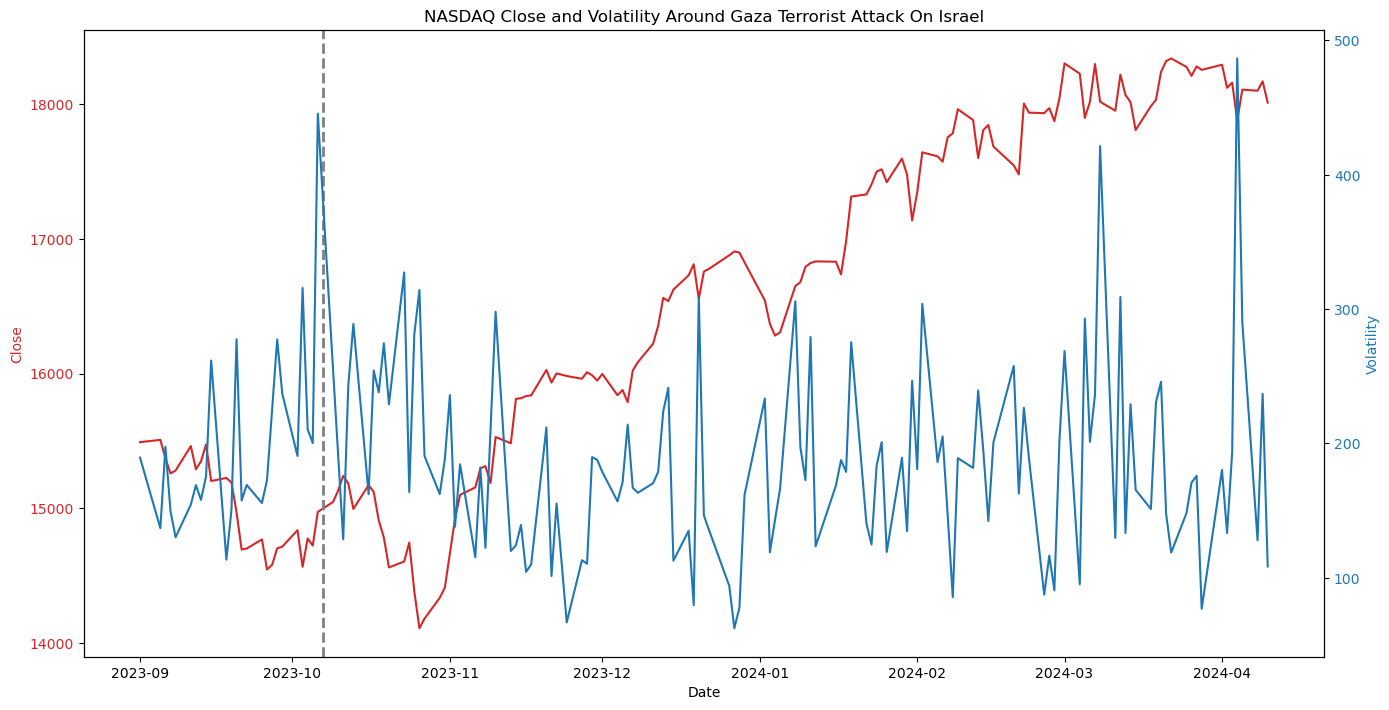

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2023-09-01'
end_date = '2024-04-10'
announcement_date = '2023-10-07'
event_window = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(event_window['Date'], event_window['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=pd.to_datetime(announcement_date), color='grey', linestyle='--', lw=2)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volatility', color=color)  # we already handled the x-label with ax1
ax2.plot(event_window['Date'], event_window['Volatility'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('NASDAQ Close and Volatility Around Gaza Terrorist Attack On Israel')
plt.show()